El siguiente Notebook incluye una sección de f'string y un par de anotaciones sobre el lenguaje de python, sin embargo, consiste principalmente en un cuaderno sobre resolución de ecuaciones diferenciales ordinarias y numéricas, mediante distintos métodos numéricos. Además, incluye una parte sobre procesos aleatorios y métodos implicados para fenómenos físicos estocásticos.

### Feb 13 - 2023
# Repaso y cosas nuevas de python
Para empezar, es importante resaltar la manera en la que se crean variables en python. Cuando creamos una variable el lenguaje lo caracteriza de manera que crea el tipo de variable dependindo de como dimos la información, es decir, sin decirlo explicitamente,

In [2]:
x = 5
y = 5.1
print('la variable x=',x,'es de tipo',type(x))
print('la variable y=',y,'es de tipo',type(y))

la variable x= 5 es de tipo <class 'int'>
la variable y= 5.1 es de tipo <class 'float'>


esto es importante de ver, ya que esto puede influir en la eficiencia de nuestro codigo o en la manipulación de variables que estamos realizando.
Por otra parte, una variable no solo se distingue por su nombre si no tambien por donde se encuentra. Es por esto que debemos tener cuidado de las librerias u herramientas de computo que utilizamos con el fin de optimizar memoria. Es por esto que realizar manipulación de arreglos con numpy o math es diferente, ya que cada uno maneja los arreglos diferentes repercutiendo en la memoria cache, en el caso de numpy toda la info se encuentra en la cache y en el caso de math debemos sacar informaciónd de la Ram, lo que puede ser mucho más demorado.

Por otra parte, es posible ver la manera en que se identifican las variables utilizando la función `id()`, devolviendo la dirección de memoria en la que se encuentra la variable, como sigue:

In [5]:
print('el id o identificador de la variable x es',id(x))

el id o identificador de la variable x es 139739776797104


In [4]:
# Qué hace la función 
help(id) 

Help on built-in function id in module builtins:

id(obj, /)
    Return the identity of an object.
    
    This is guaranteed to be unique among simultaneously existing objects.
    (CPython uses the object's memory address.)



In [9]:
print(id(x == y))   #Dirección de memoria
print(type(x == y)) #Tipo de variable

7637920
<class 'bool'>


Ahora, la forma en que se muestran cosas en la pantalla se pueden relizar de manera mas sencilla utilizando f-string como sigue

In [10]:
var = input("Please write something :\t") #nos pide un input y lo llama var
print("You have written : " + var)        #una forma de imprimir   
print(f"You have written : {var}")        #Forma de imprimir utilizando f-string que pude ser más eficiente

Please write something :	hello word
You have written : hello word
You have written : hello word


In [11]:
x1 = 5
y1 = 2.34
print("x = %04d \t y = %.1f \n y=%20.16e\n"%(x, y, y)) #Sintaxis complicada
print(f"x = {x:04d} \t y = {y:.1f} \n y={y:20.16e}")   #Aqui imprimo utilizando f-strign y resulta más eficiente 

x = 0005 	 y = 5.1 
 y=5.0999999999999996e+00

x = 0005 	 y = 5.1 
 y=5.0999999999999996e+00


Como ejemplo de como utilizar f-string, esta el siguiente, donde se evidencia que incluso se pueden hacer operaciones dentro del string

In [17]:
x = 5.0
y = -4.64
###.5f nos dice 5 decimales y es flotante
###010 nos da 10 espacios repletos de ceros
###10 nos da 10 espacios sin especificar con que lo rellena
###\n nos da un espacio
print(f"x = {x} y = {y}\n x+y = {x+y:010.5f}\n x+y = {x+y:10.5f}") 

x = 5.0 y = -4.64
 x+y = 0000.36000
 x+y =    0.36000


### abril 14 - 2023
# Metodos Runge-Kutta para ecuaciones acopladas y de segundo orden
Vamos a resolver el siguiente problema de una ecuación diferencial ordinaria 
$$ \frac{dy}{dx}=\left(1+2x\right)\sqrt{y}  $$
donde $y\left(0\right)=1$. Resolveremos esta ecuación por medio de:
* Una solución analitica.
* Método de Euler $n=0.01$
* Método del punto medio $h=0.01$
* Método del RK4 $h=0.01$
y veamos que esto nos da una buena aproximación. 

In [1]:
#Libreriras 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
#Solución analitica
h = 0.01
N = int(1/h)
X = np.linspace(0,1,N)
Y_analitic = (2+ X + X**2)**2 /4


In [4]:
#Función de la ecuación diferencial 
def f(x,y):
    return (1+2*x)*(y**(1/2))

In [5]:
#Metodo de Euler
Y_euler = np.zeros(N)
Y_euler[0] = 1
x = 0
for i in range(0,N-1):
    x += h
    Y_euler[i+1] = Y_euler[i] + h*f(x,Y_euler[i])
    

In [6]:
#Metodo de punto medio
Y_PM = np.zeros(N)
Y_PM[0] = 1
x = 0
for i in range(0,N-1):
    x +=h
    k1 = f(x,Y_PM[i])
    k2 = f(x + h/2,Y_PM[i]+h*k1/2)
    Y_PM[i+1] = Y_PM[i] + h*k2

In [7]:
#Metodo RK4
Y_rk = np.zeros(N)
Y_rk[0] = 1
x = 0
for i in range(0,N-1):
    x +=h
    k1 = f(x,Y_PM[i])
    k2 = f(x + h/2,Y_rk[i]+h*k1/2)
    k3 = f(x + h/2,Y_rk[i]+h*k2/2)
    k4 = f(x + h,Y_rk[i]+h*k3)
    Y_rk[i+1] = Y_rk[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

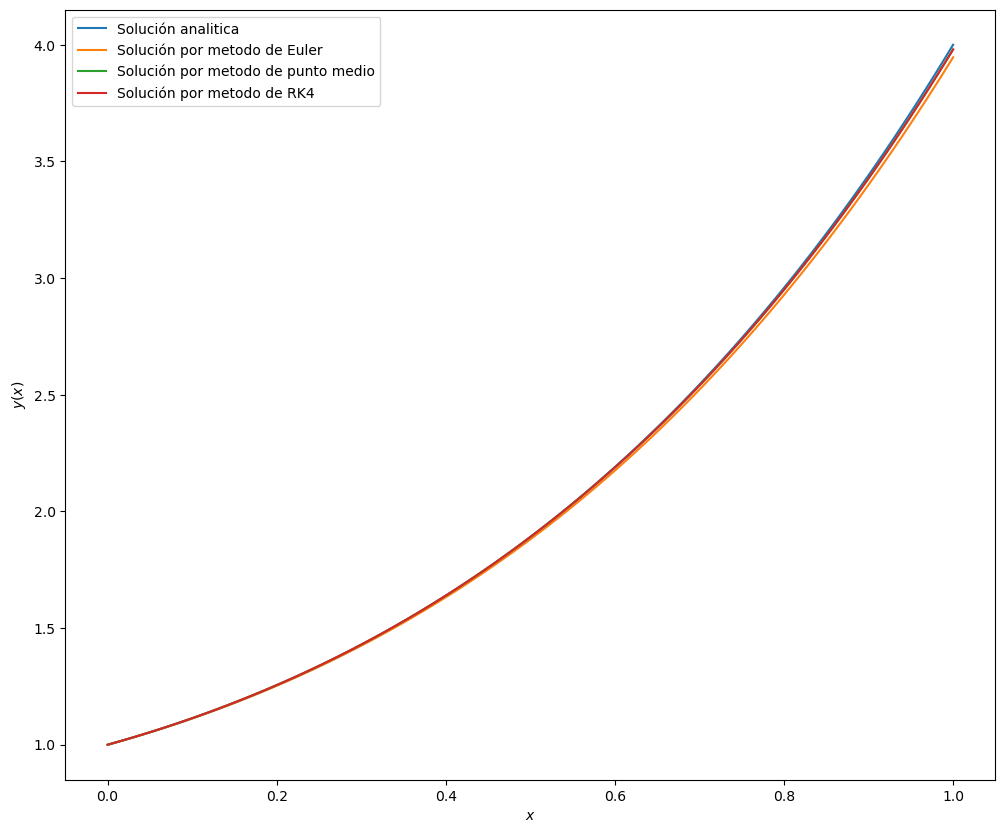

In [9]:
plt.figure(figsize=(12,10))
plt.plot(X,Y_analitic,label='Solución analitica')
plt.plot(X,Y_euler,label='Solución por metodo de Euler')
plt.plot(X,Y_PM,label='Solución por metodo de punto medio')
plt.plot(X,Y_rk,label='Solución por metodo de RK4')
plt.xlabel(r'$x$')
plt.ylabel(r'$y\left(x\right)$')
plt.legend()
plt.show()

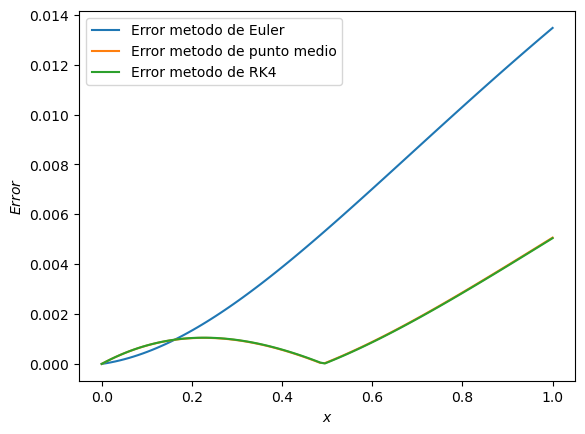

In [10]:
Eeu = np.abs(Y_euler-Y_analitic)/Y_analitic
Epm = np.abs(Y_PM-Y_analitic)/Y_analitic
Erk = np.abs(Y_rk-Y_analitic)/Y_analitic

plt.plot(X,Eeu,label='Error metodo de Euler')
plt.plot(X,Epm,label='Error metodo de punto medio')
plt.plot(X,Erk,label='Error metodo de RK4')
plt.xlabel(r'$x$')
plt.ylabel(r'$Error$')
plt.legend()
plt.show()

## Metodo general de RK4
Analicemos cual es el paso más indicado para una ecuación diferencial de la forma 
$$ \left(1+2x\right)y^{\sin{\left(xy\right)}} $$

In [2]:
def RK4(x0,xf,y0,f,h):
    N = int(np.abs(xf-x0)/h)
    X = np.zeros(N)
    Y = np.zeros(N)
    x = x0
    
    X[0] = x0
    Y[0] = y0 
    for i in range(0,N-1):
        x +=h
        k1 = f(X[i],Y[i])
        k2 = f(X[i] + h/2,Y[i]+h*k1/2)
        k3 = f(X[i] + h/2,Y[i]+h*k2/2)
        k4 = f(X[i] + h,Y[i]+h*k3)
        Y[i+1] = Y[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        X[i+1] = x
    return X, Y
    

In [11]:
def f1(x,y):
    return (1+2*x)*(y**np.sin(x*y))

Solution1 = RK4(0,3,1,f1,0.5)
Solution2 = RK4(0,3,1,f1,0.1)
Solution3 = RK4(0,3,1,f1,0.01)
Solution4 = RK4(0,3,1,f1,0.001)


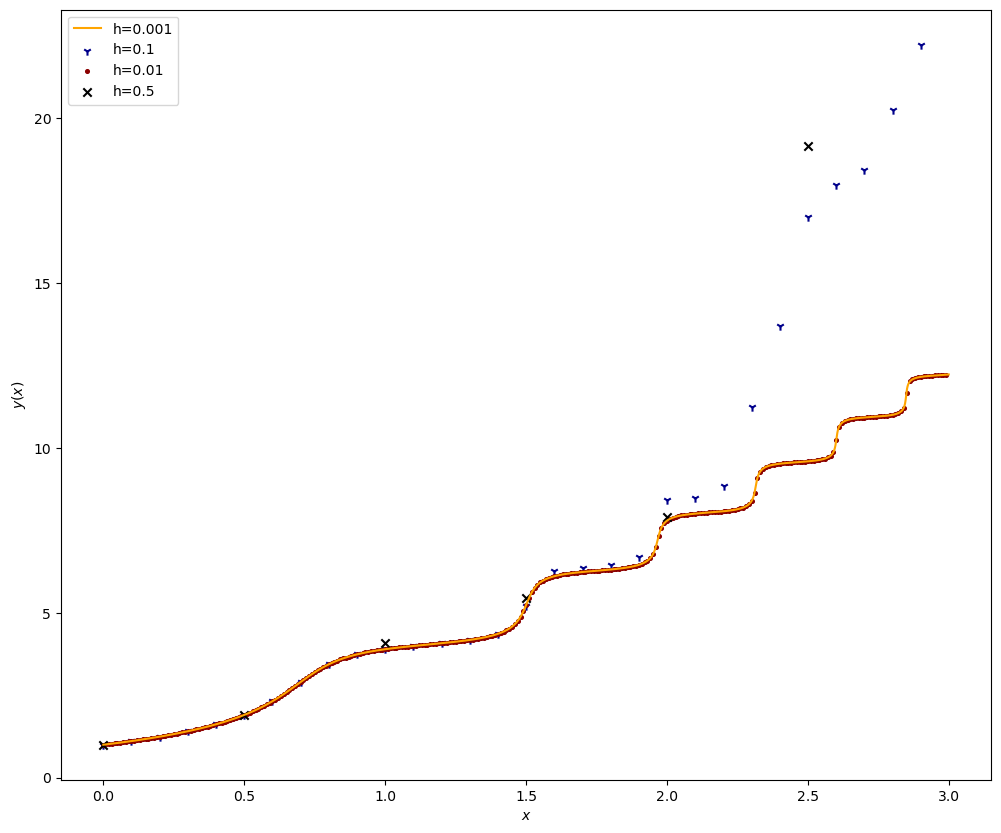

In [20]:
plt.figure(figsize=(12,10))
plt.plot(Solution4[0],Solution4[1],label='h=0.001',color="orange")
plt.scatter(Solution2[0],Solution2[1],label='h=0.1',color="darkblue",marker="1")
plt.scatter(Solution3[0],Solution3[1],label='h=0.01',s=7,color="darkred")
plt.scatter(Solution1[0],Solution1[1],label='h=0.5',marker="x",color="black")
plt.xlabel(r'$x$')
plt.ylabel(r'$y\left(x\right)$')
plt.legend()
plt.show()

Nos damos cuenta de que para pasos muy grandes crece el error numérico, sin embargo, esto depende de la ecuación computacional y en algunas ocasiones un paso grande es aceptable, para esto se introducen métodos de pasos adaptativos.

### abril 17 - 2023
## Ecuaciones diferenciales acopladas
Vamos a realizar un ejemplo con las ecuaciones de Lotka-Volerra, las cuales modelan los sistemas depredador-presa. La ecuación diferencial acoplada de interés es:
$$  \frac{dx}{dt} = \alpha x- \beta xy $$
$$  \frac{dy}{dt} = \delta xy -\gamma y$$

In [1]:
#Libreriras 
import numpy as np 
import matplotlib.pyplot as plt

#Constantes
alpha = 1.1
beta  = 0.4
gamma = 0.4
delta = 0.1

In [6]:
#Runge-Kuta de cuarto orden para ecuaciones acopladas

def RK4_acop(x0,y0,t0,tf,f,g,h):
    N = int(np.abs(tf-t0)/h)
    X = np.zeros(N)
    Y = np.zeros(N)
    T = np.zeros(N)
    t = t0
    
    T[0] = t0
    X[0] = x0
    Y[0] = y0 
    for i in range(0,N-1):
        t +=h
        
        k1x = f(T[i],X[i],Y[i])
        k1y = g(T[i],X[i],Y[i])
        
        k2x = f(T[i] + h/2,X[i]+h*k1x/2,Y[i]+h*k1y/2)
        k2y = g(T[i] + h/2,X[i]+h*k1x/2,Y[i]+h*k1y/2)
        
        k3x = f(T[i] + h/2,X[i]+h*k2x/2,Y[i]+h*k2y/2)
        k3y = g(T[i] + h/2,X[i]+h*k2x/2,Y[i]+h*k2y/2)
        
        k4x = f(T[i] + h,X[i]+h*k3x,Y[i]+h*k3y)
        k4y = g(T[i] + h,X[i]+h*k3x,Y[i]+h*k3y)
        
        
        X[i+1] = X[i] + (h/6)*(k1x + 2*k2x + 2*k3x + k4x)
        Y[i+1] = Y[i] + (h/6)*(k1y + 2*k2y + 2*k3y + k4y)
        T[i+1] = t
        
    return T, X, Y

#Funciones de las ecuaciones diferenciales
def f(t,x,y):
    return alpha*x - beta*x*y

def g(t,x,y):
    return delta*x*y - gamma*y

In [7]:
h = 0.01
Solution = RK4_acop(30,7,0,100,f,g,h)

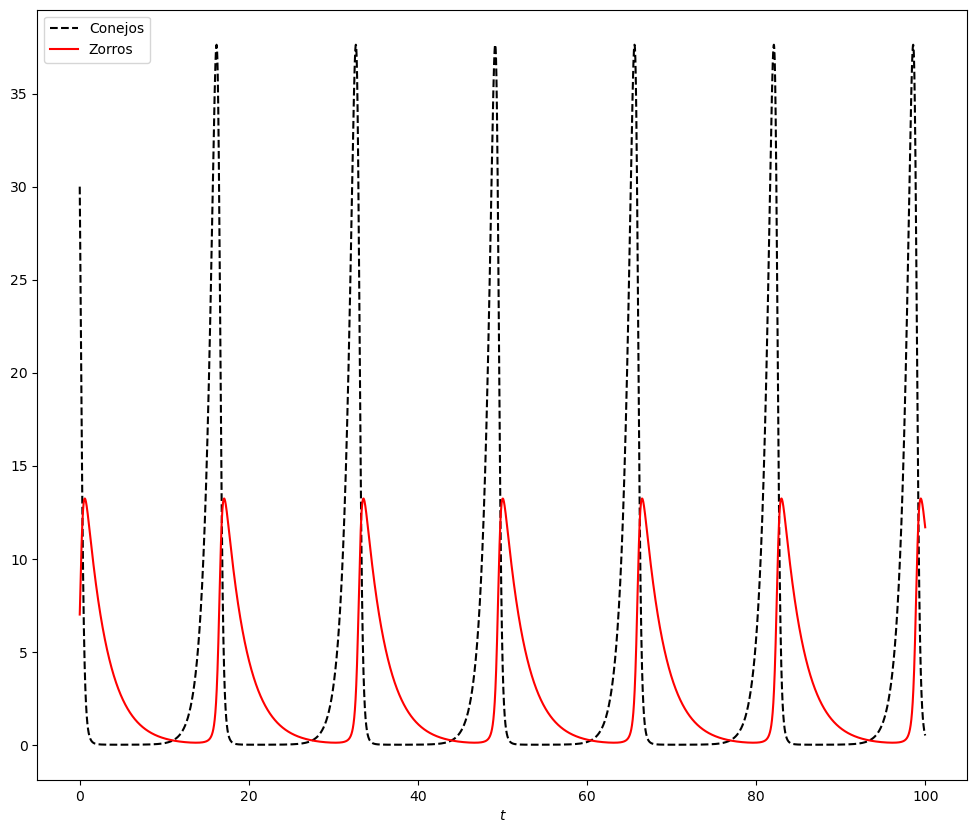

In [13]:
plt.figure(figsize=(12,10))
plt.plot(Solution[0],Solution[1],'k--',label='Conejos')
plt.plot(Solution[0],Solution[2],'r-',label='Zorros')
plt.xlabel(r'$t$')
plt.legend()
plt.show() 

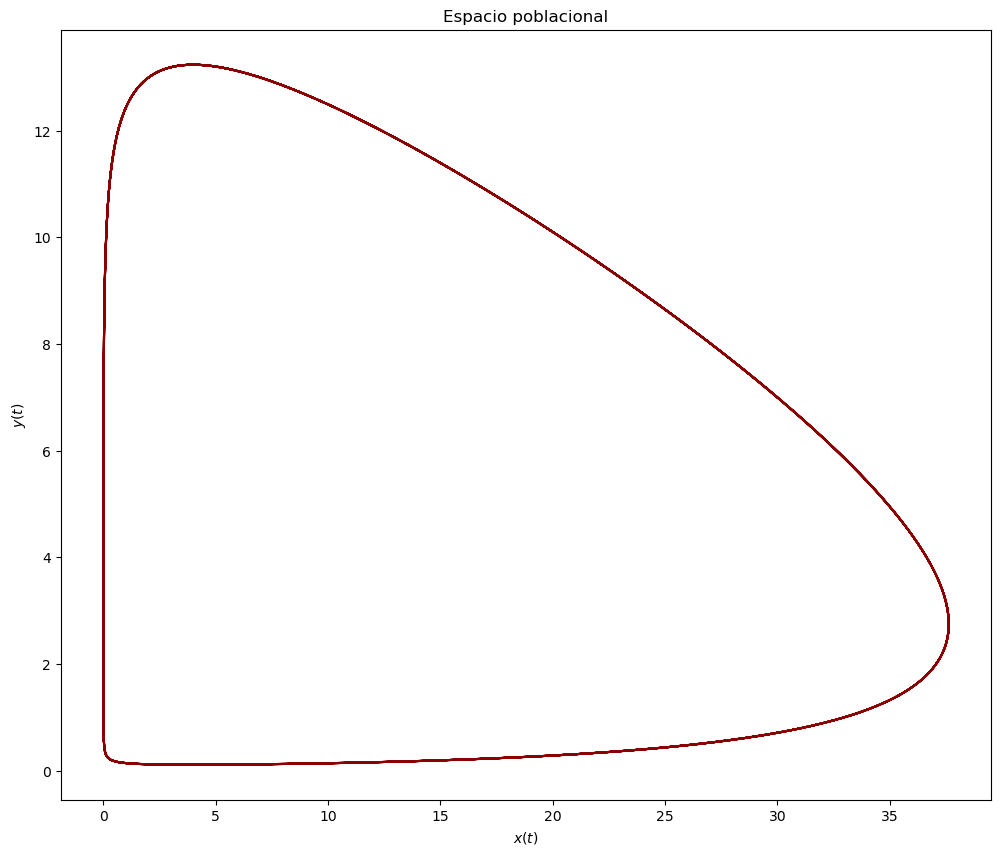

In [17]:
plt.figure(figsize=(12,10))
plt.plot(Solution[1],Solution[2],color="darkred")
plt.xlabel(r'$x\left(t\right)$')
plt.ylabel(r'$y\left(t\right)$')
plt.title('Espacio poblacional')
plt.show()

## Ecuaciones diferenciales de segundo orden
Consideremos un oscilador acoplado. La ecuación que describe el sistema es una ecuación de segundo orden; sin embargo, es posible reescribir esta ecuación para tener un sistema de ecuaciones diferenciales acoplados. Con esto obtendremos entonces:
$$ \frac{dx}{dt} = v $$
$$ \frac{dv}{dt} = -\frac{c}{m}v -\frac{k}{m}x + \frac{F\left(t\right)}{m} $$

In [25]:
alpha1 = 2
beta1   = 1
Fnorm  = 0.1
def v(t,x,v):
    return v
def dvdt(t,x,v):
    return - alpha1*v - beta1*x + Fnorm*np.cos(1.1*t)

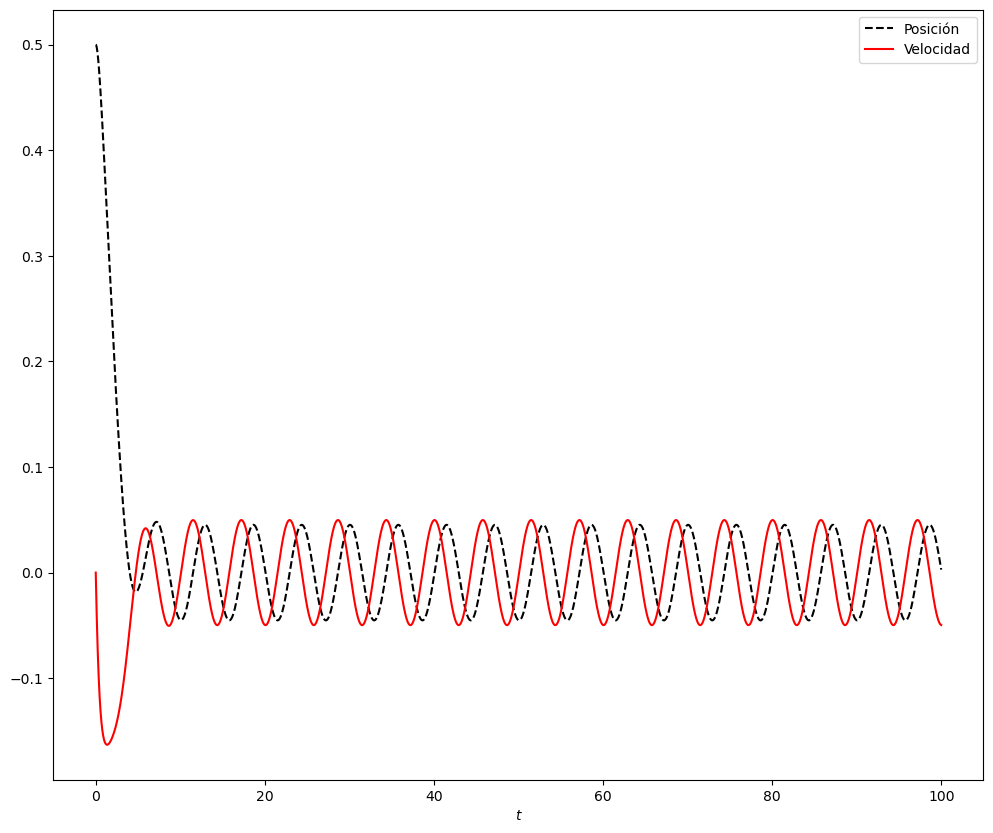

In [26]:
Solution_Os = RK4_acop(0.5,0,0,100,v,dvdt,h)
plt.figure(figsize=(12,10))
plt.plot(Solution_Os[0],Solution_Os[1],'k--',label='Posición')
plt.plot(Solution_Os[0],Solution_Os[2],'r-',label='Velocidad')
plt.xlabel(r'$t$')
plt.legend()
plt.show() 

### Abril 21 - 2023
# Solución de ecuaciones diferenciales en Scipy
Scipy es una librería especializada para la resolución ecuaciones diferenciales, en general, nos interesa estudiar más métodos o librerías implementadas en python. En general, ahora analizaremos problemas con condiciones de frontera, médiente una serie de métodos conocidos como "Shooting Methods", los cuales redicen condicones de frontera a un problema de condiciones iniciales. 
## scipy.integrate.solve_ivp
Como tal, los parámetro de esta función son:

scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)

Los cuales analizaremos acontinuación

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [6]:
#Defino una función con la ecuación diferencial acoplada cuya primera entrada sea el dominio y la segunda una lista de soluciones
alpha = 1.1
beta  = 0.4
gamma = 0.4
delta = 0.1
def fun(t,y):
    f1 = alpha*y[0]-beta*y[1]*y[0]
    f2 = delta*y[0]*y[1] - gamma*y[1]
    return [f1,f2]

#Condiones iniciales
y0      = [100, 7] 
#Domonio de integración
t_span  = [0, 100]
#Lista de puntos donde se evaluara la funcion
t_dom = np.linspace(t_span[0],t_span[1],1000)
#Solución
Solution = solve_ivp(fun,t_span,y0,t_eval=t_dom)

t_dom  = Solution.t    #Soluciones
y1_sol = Solution.y[0] #Solucion f1
y2_sol = Solution.y[1] #Solucion f2

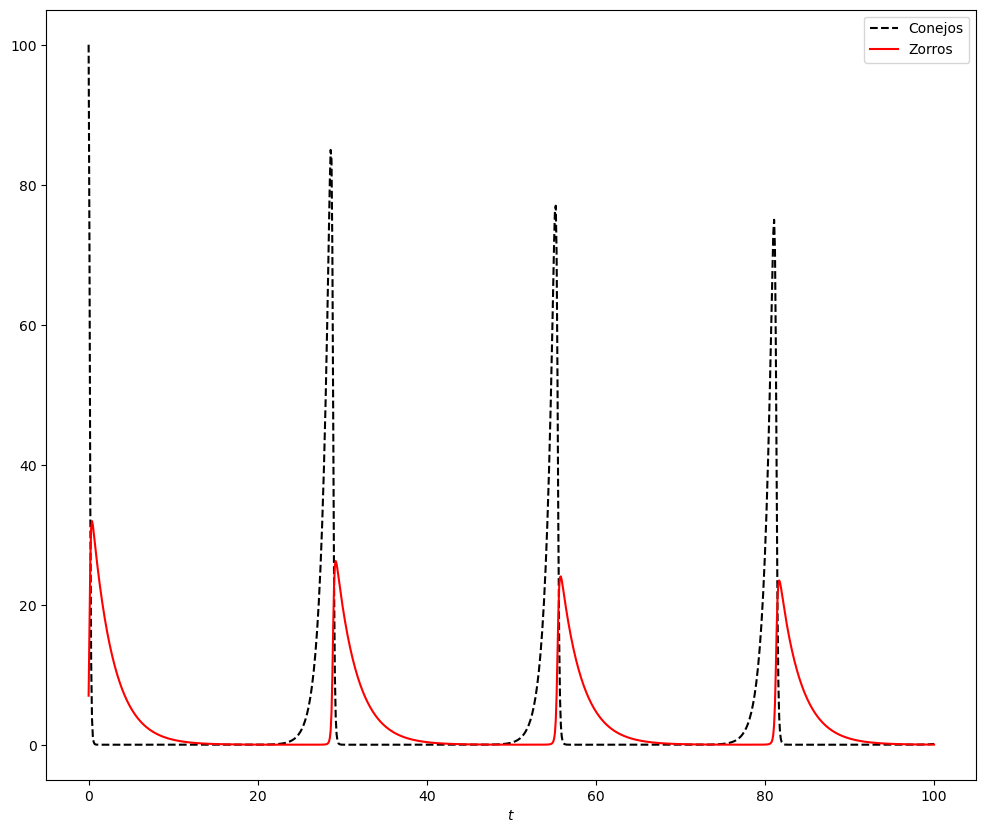

In [7]:
plt.figure(figsize=(12,10))
plt.plot(Solution.t,Solution.y[0],'k--',label='Conejos')
plt.plot(Solution.t,Solution.y[1],'r-',label='Zorros')
plt.xlabel(r'$t$')
plt.legend()
plt.show() 

In [19]:
##Ej2: OScliador de Duffing

#constantes
alpha_1 = 0
beta_1  = 4*np.pi**2
delta_1 = 0.1*np.pi
gamma_1 = 30*np.pi**2
omega_1 = 2*np.pi

#Función
def dYdt(t,Y):
    y1 = Y[1]
    y2 = gamma_1*np.cos(omega_1*t) - delta_1*Y[1] - alpha_1*Y[0] - beta_1*Y[0]**3
    return [y1,y2]

#Dominio de integración
t_lim = [0,10]
#Condiciones iniciales 
Y0 = [1,0]
#Lista de puntos donde se evalua la funcion
Y_dom = np.linspace(t_lim[0],t_lim[1],1000)
#Solución
Sol_1 = solve_ivp(dYdt,t_lim,Y0,t_eval=Y_dom)

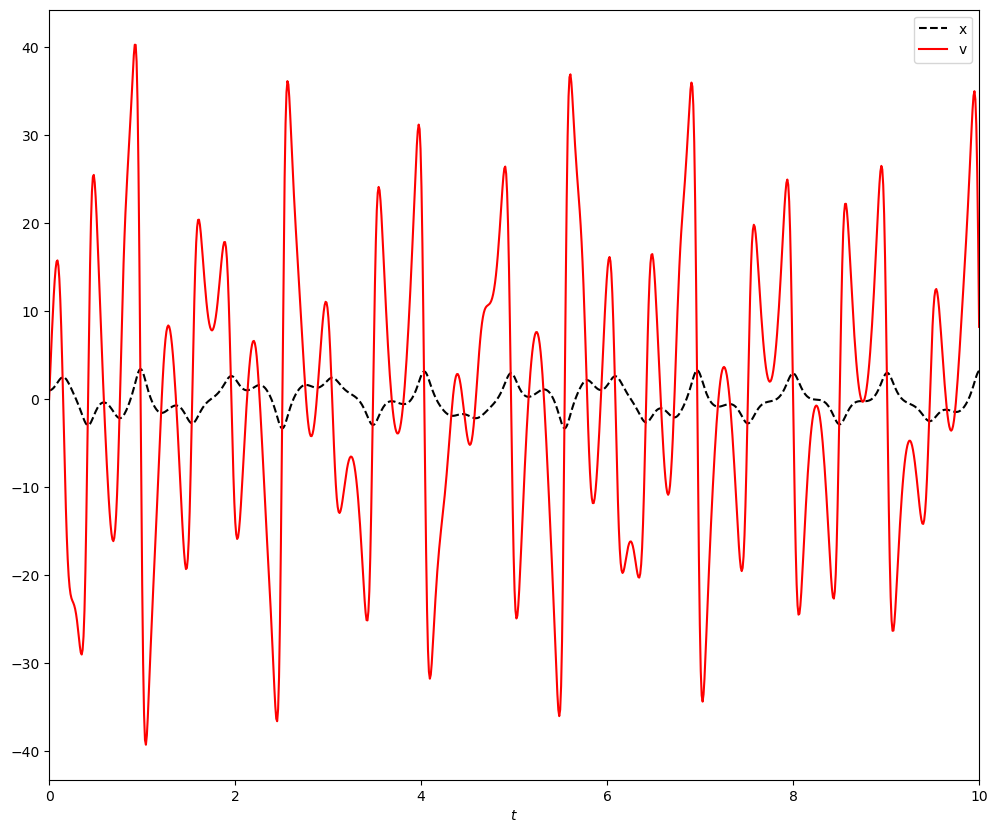

In [15]:
#Grafico
plt.figure(figsize=(12,10))
plt.plot(Sol_1.t,Sol_1.y[0],'k--',label='x')
plt.plot(Sol_1.t,Sol_1.y[1],'r-',label='v')
plt.xlabel(r'$t$')
plt.xlim(0,10)
plt.legend()
plt.show() 

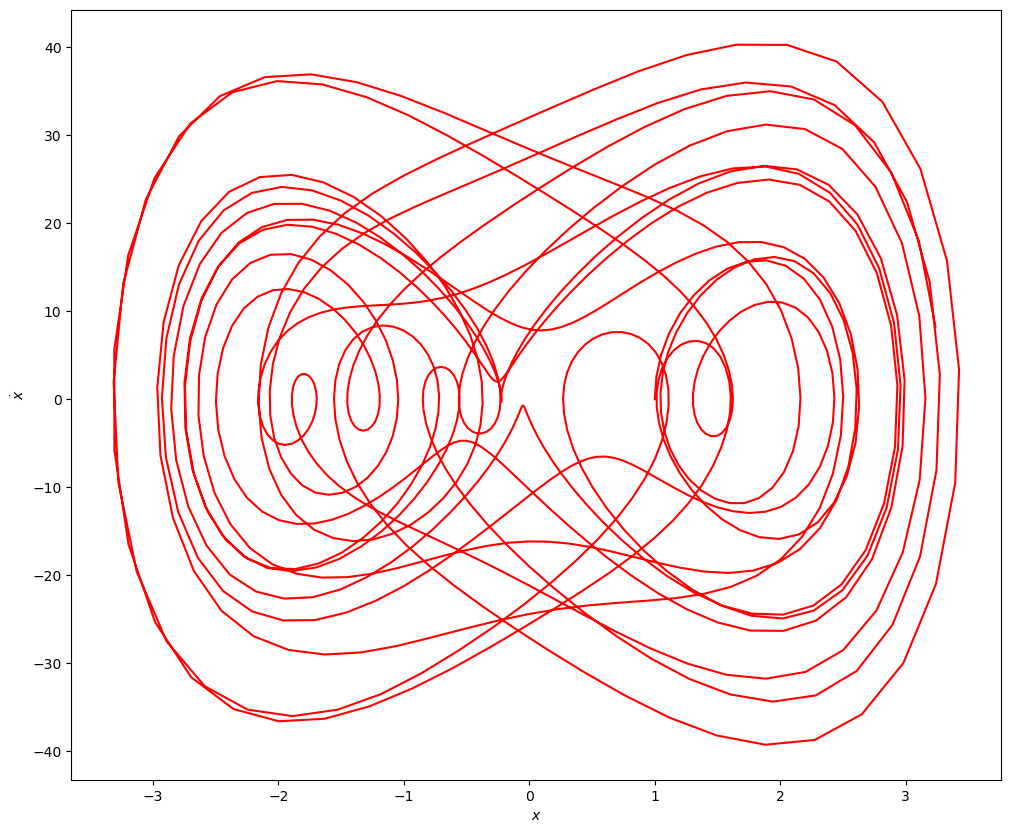

In [20]:
#Espacio de fase
plt.figure(figsize=(12,10))
plt.plot(Sol_1.y[0],Sol_1.y[1],'r-')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x}$')
plt.show() 

In [26]:
#Ej3: Sección de Poincare para analizar sistemas caoticos
t_lim2 = [0,10000]
Sol_2 = solve_ivp(dYdt,t_lim2,Y0,t_eval=np.linspace(t_lim2[0],t_lim2[1],t_lim2[1]+1))

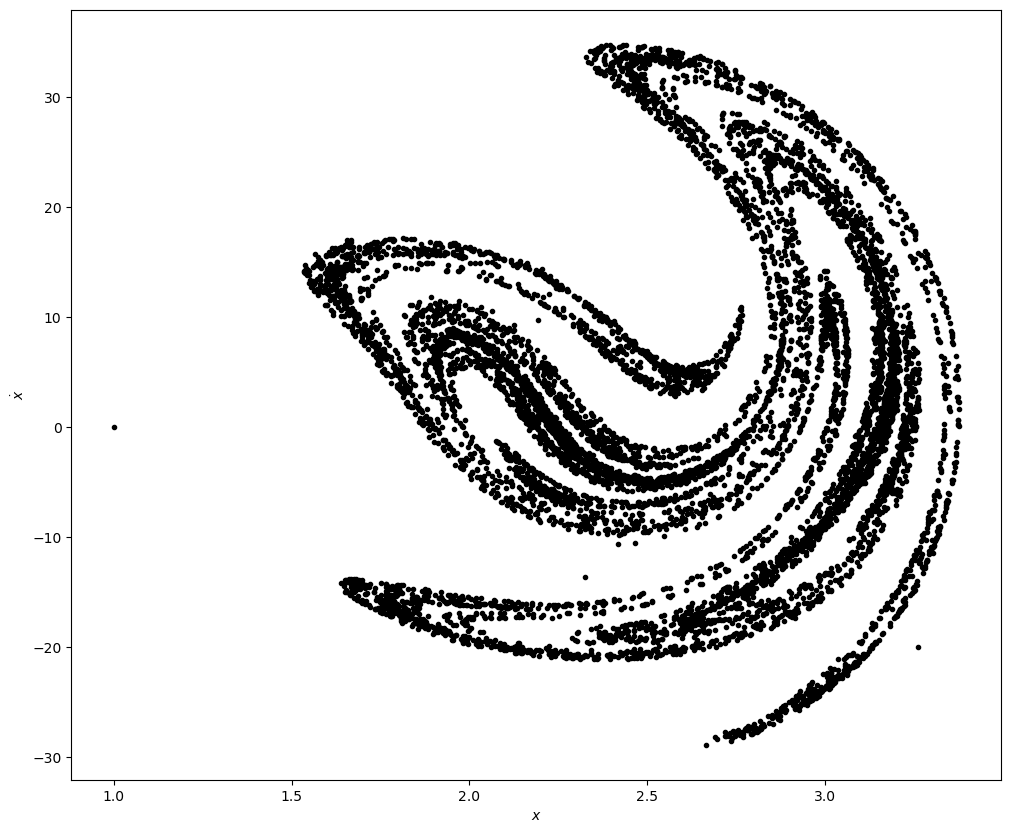

In [28]:
plt.figure(figsize=(12,10))
plt.plot(Sol_2.y[0],Sol_2.y[1],'k.')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x}$')
plt.show() 

## Ej4: Modelo de Kuramoto (Sincronización)
Consideremos una red de nodos, de modo que tendemos 
$$ \frac{\theta_i (t)}{dt}= \sum_{j=1}^N A_{ij} \sin{\left[\theta_j(t)-\theta_i(t)\right]} $$
Que corresponden a N ecuaciones diferenciales acopladas y con $A_{ij}$ la matriz de transferencia que nos indica como se encuentran conectados los nodos en la red de cuaciones diferenciales. Escojamos el caso de $N=5$ ecuaciones diferenciales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

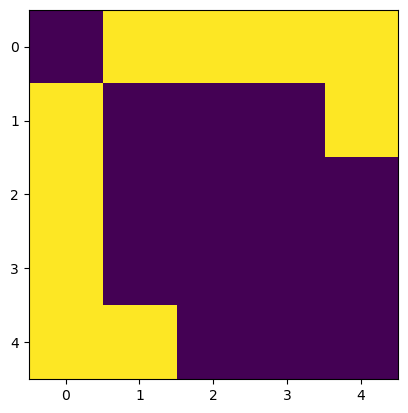

In [7]:
#Matriz de transferencia
A = np.array([[0,1,1,1,1],[1,0,0,0,1],[1,0,0,0,0],[1,0,0,0,0],[1,1,0,0,0]])
nv = len(A)
#Plot de la matriz de ransferencia 
plt.imshow(A)

In [12]:
#Función
def fK(t,Y):  
    Sol = np.zeros(nv)
    for i in range(nv):
        Sol[i] = sum(A[i][j]*np.sin(Y[j]-Y[i]) for j in range(nv))
    return Sol

#Condiciones iniciales aleatorias
Yk0   = np.pi*np.random.random(nv)
t_lim = [0,10]
Y_dom = np.linspace(t_lim[0],t_lim[1],100)
Sol_3 = solve_ivp(fK,t_lim,Yk0,t_eval=Y_dom)

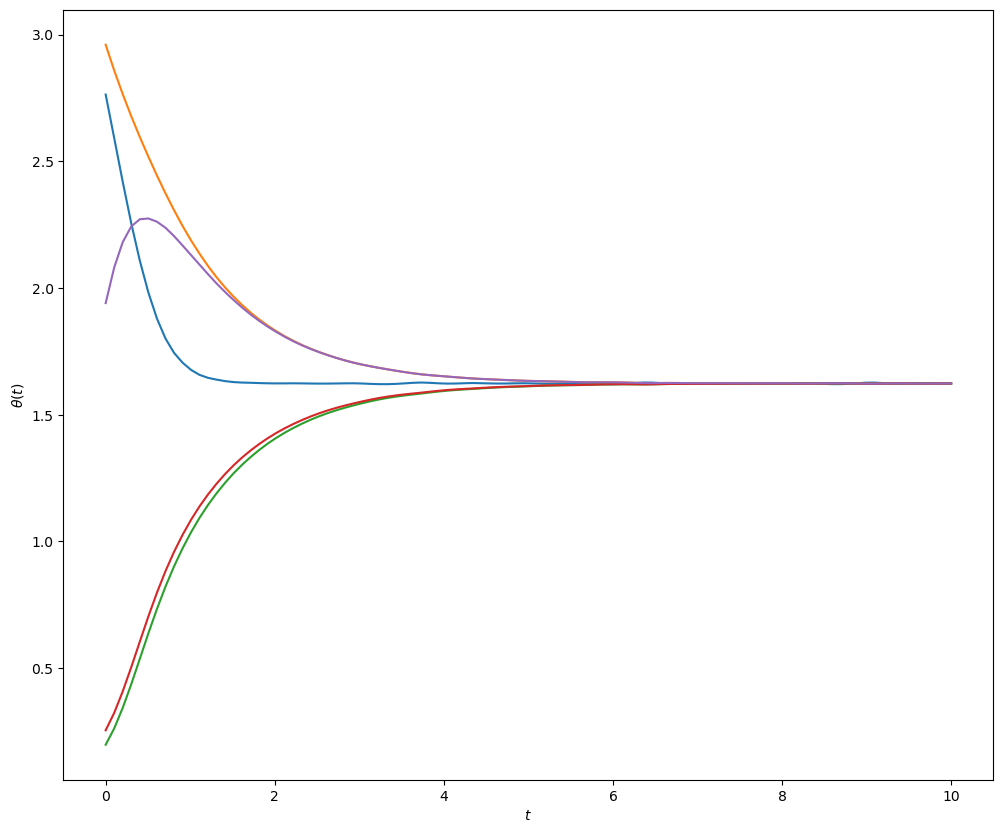

In [18]:
#En el diagrama se ve como los nodos tienden a sincronizarse
plt.figure(figsize=(12,10))
for i in range(nv):
    plt.plot(Sol_3.t,Sol_3.y[i])
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta(t)$')
plt.show() 

### Abril 24 - 2023 
# Modelo de Kuramoto general con valores aleatorios


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [4]:
Nv = 100
matA = np.zeros([Nv,Nv])
for i in range(Nv):
    for j in range(Nv):
        matA[i][j] = np.random.choice([0,1],p=[0.5,0.5])
        matA[j][i] = matA[i][j]

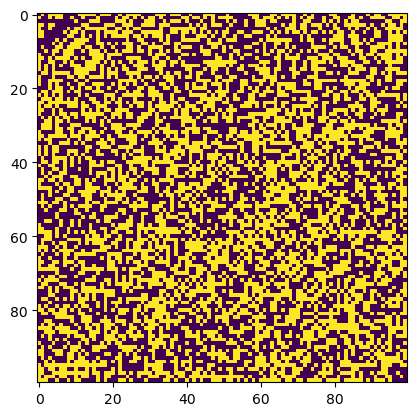

In [5]:
plt.imshow(matA)
plt.show()

In [10]:
def fK(t,Y):  
    Sol = np.zeros(Nv)
    for i in range(Nv):
        Sol[i] = sum(matA[i][j]*np.sin(Y[j]-Y[i]) for j in range(Nv))
    return Sol

Yk0   = np.pi*np.random.random(Nv)
t_lim = [0,Nv]
Y_dom = np.linspace(t_lim[0],t_lim[1],1000)
Sol_3 = solve_ivp(fK,t_lim,Yk0,t_eval=Y_dom)

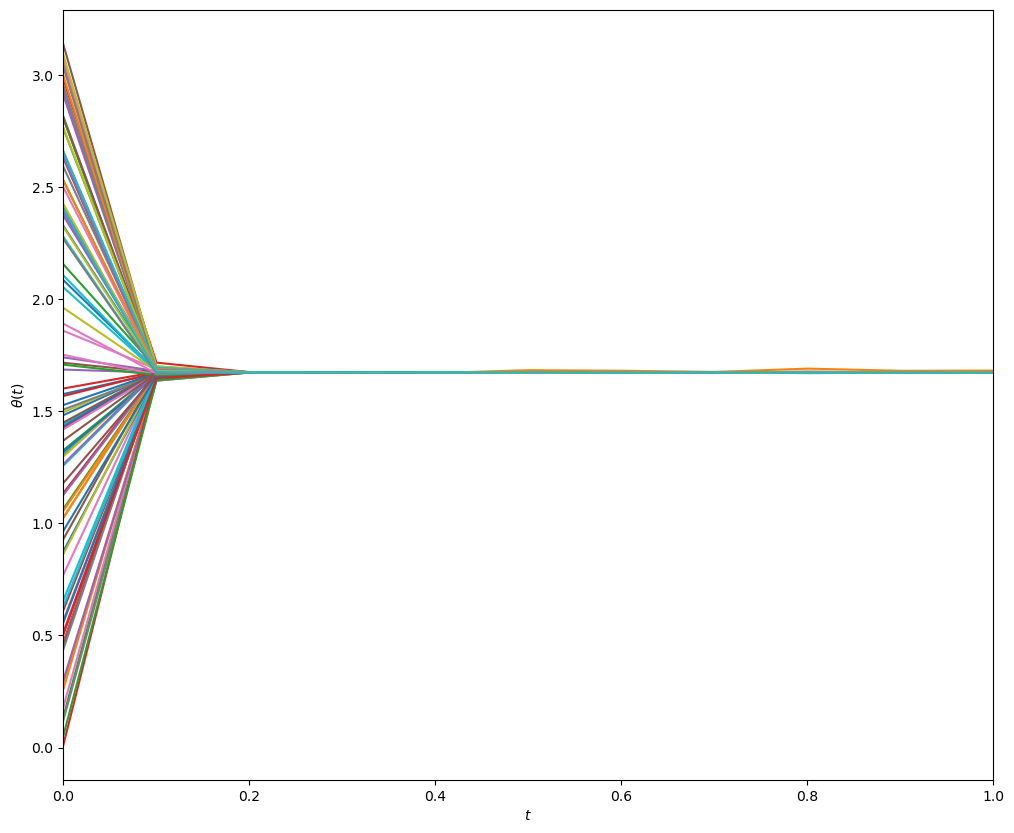

In [15]:
#En el diagrama se ve como los nodos tienden a sincronizarse
plt.figure(figsize=(12,10))
for i in range(Nv):
    plt.plot(Sol_3.t,Sol_3.y[i])
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta(t)$')
plt.xlim(0,1)
plt.show() 

# Método de "Shooting"
Consideremos porblemas con condiciones de forntera, de modo que tenemos ecuaciones diferenciales de la forma 
$$ y'' = f(x,y,y'), \quad y(a)=\alpha, \quad  y(b)=\beta     $$
Sin embargo, vamos a adaptar el metodo RK a estos problemas, para eso convertiremos el problema a uno trabajable, de modo que 
$$ y'' = f(x,y,y'), \quad y(a)=\alpha, \quad  y'(a)=u    $$
---
Consideremos en el problema 
$$\frac{d^2x}{dt^2} +3x =0$$
con condiciones 
$$ x(0)=7 \quad x(2\pi)=0 $$
Lo cual podemos reescribir como 
\begin{aligned}
\frac{dx}{dt} & = y \quad &x(0)=7\\
\frac{dy}{dt} & = -3x \quad &y(0) = u
\end{aligned}
donde $u$ es un parámetro que vamos a variar hasta  que encontremos la solución que cumpla con las condiciones de frontera.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
#Primera aproximación
def fun(t,F):
    return [F[1],-3*F[0]]

t_span = [0,2*np.pi]
F0 = [7,7.1]
Sol = solve_ivp(fun,t_span,F0,t_eval = np.linspace(0,2*np.pi,1000))

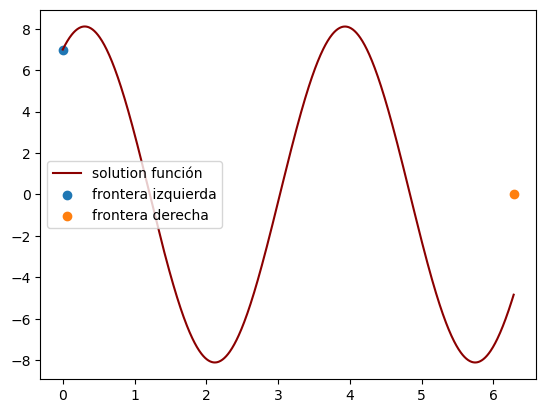

In [5]:
plt.plot(Sol.t,Sol.y[0],label='solution función',color='darkred')
plt.scatter(0,7,label='frontera izquierda')
plt.scatter(2*np.pi,0,label='frontera derecha')
plt.legend()
plt.show()

In [6]:
#Definamos una función que nos devuelva el punto final
def Fend(u):
    t_spanend = [0,2*np.pi]
    F0end = [7,u]
    Solend = solve_ivp(fun,t_spanend,F0end,t_eval = np.linspace(0,2*np.pi,1000))
    return Solend.y[0][-1]


In [28]:
n  = 1000
U  = np.linspace(-100,100,n)
X0 = np.zeros(n)
for i in range(n):
    X0[i] = Fend(U[i]) 

u_real = []
for i in range(n):
    if np.abs(X0[i]) < 1e-1:
        u_real.append(U[i])
    else:
        continue

In [30]:
u_real , Fend(u_real[-1])

([-1.5015015015014939, -1.3013013013012937], -0.02030876720555863)

Se puede encontrar una mejor aproximación al punto que nos cumple la condición inicial utilizando métodos para encontrar ceros de funciones, como el metodo de Newton-Raphson, pero esto es una buena primera aproximación

---
### 28 de abril del 2023
# Ecuaciones diferenciales parciales
## Ecuación de Laplace
Queremos resolver ecuaciones de la forma 
$$ \nabla^2 \psi = 0 \quad con \quad \nabla^2 = \sum_i \frac{\partial ^2}{\partial x_i^2}$$
Donde $i$ es un índice que recorre las coordenadas del problema, es decir, la suma va hasta el grado de libertad. Para solucionar esta ecuación nos interesa tener una expresión discretizada y de esa forma realizar un método particular para la ecuación de laplace donde asignamos el valor de un punto como el promedio de los valores de su vecindad. Realizando este procedimiento obtendremos
$$ \psi(x,y) = \frac{1}{4} \left[  \psi(x,y+\Delta y) + \psi(x+\Delta x, y) + \psi(x,y-\Delta y) + \psi(x-\Delta x, y) \right]  $$

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
#Creo el rango de valores de las variables y una solución en blanco
x_len = 200
y_len = 200
Psi_sol = np.zeros([x_len,y_len])

In [68]:
#Condiciones de frontera (temperatura en la frontera)
T_left   = 100
T_right  = 100
T_botton = 100
T_top    = 0

In [69]:
#Agrego los valores de frontera
Psi_sol.fill(30)
Psi_sol[0].fill(T_top)
Psi_sol[-1].fill(T_botton)
Psi_sol[1:,0].fill(T_left)
Psi_sol[1:,-1].fill(T_right)

In [70]:
#Vamos a realizar iteraciónes que nos permitan calcular el valor de la función de laplace
#Sin embargo, esto lo haremos una gran cantidad de veces hasta converger al valor real de la función armonica
for ss in range(1000):
    for i in range(1,x_len-1):
        for j in range(1,y_len-1):
            Psi_sol[i][j] = (Psi_sol[i][j+1]+Psi_sol[i+1][j]+Psi_sol[i-1][j]+Psi_sol[i][j-1])/4

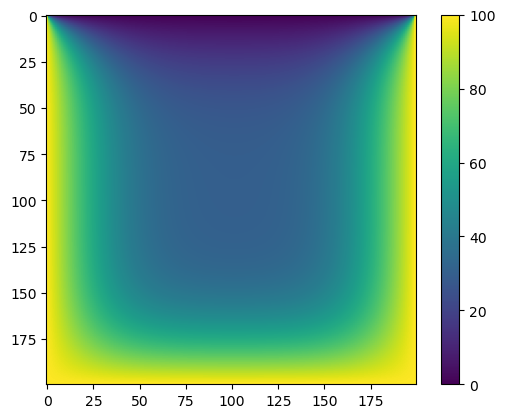

In [71]:
#Solución en el espacio
plt.imshow(Psi_sol)
plt.colorbar()
plt.show()

### Mayo 5, 2023
# Ecuación de Difusión
Ahora trabajaremos con el operador laplaciano, con la diferencia de que tendremos además un término temporal proporcional por la constante de difusión. La ecuación de difusión viene dado por: 
$$ \nabla^2 \psi(\vec{x},t) = C\frac{\partial\psi(\vec{x},t)}{\partial t} $$
donde la forma discreta de la segunda derivada viene dada por:
$$ \frac{d^2f}{dx^2} \approx -\frac{1}{\left(\Delta x\right)^2}\left[2f(x)-f(x+\Delta x) - f(x -\Delta x)  \right]  $$
Por lo tanto, si reemplazamos en la ecuación de difusión en una dimensión con $c=D/2$, obtendremos
$$-\frac{1}{\left(\Delta x\right)^2}\left[2\psi(x,t)-\psi(x+\Delta x,t) - \psi(x -\Delta x,t)  \right] =C\frac{\partial\psi(\vec{x},t)}{\partial t}  $$ 
y luego, reemplazando la derivada temporal por una derivada forward tendremos
$$-\frac{1}{\left(\Delta x\right)^2}\left[2\psi(x,t)-\psi(x+\Delta x,t) - \psi(x -\Delta x,t)  \right] = \frac{D}{2}\left( \frac{\psi(x,t+\Delta t)-\psi(x,t)}{\Delta t} \right)$$

Si definimos ahora un $\psi_{local}$ como
$$ \psi_{local}=\frac{1}{2}\left( \psi(x+\Delta x,t)+\psi(x-\Delta x,t) \right) $$
entonces obtendremos la expresión
$$\psi(x,t) -\psi_{local}(x,t)=- \frac{D(\Delta x)^2}{4\Delta t}\left[ \psi(x,t+\Delta t) -\psi(x,t) \right]  $$
de modo que para simplificar consideraremos 
$$  \frac{D(\Delta x)^2}{4\Delta t} = 1$$
por lo tanto, en el límite en que $\Delta x$ y $\Delta t$ son pequeños, se debe cumplor que $D$ tiende a $4\Delta t / \left(\Delta x\right)^2$ y es importante que esto se incluya en la simulación. Con esto, la relación final que obtendremos es
$$\psi_{local}(x,t)=\psi(x,t+\Delta t)  $$
Por lo tanto, los promedios locales, realizados en el operador laplaciano, nos dan como resultado un paso en el tiempo de la ecuación de difusión. Por lo que aplicar el operador de promedio local múltiples veces nos permite converger a la solución para la ecuación de Laplace. Dicho operador tiene la forma 
$$\hat{W}\psi(x,t) =\frac{1}{2}\left( \psi(x+\Delta x,t)+\psi(x-\Delta x,t) \right) =\psi(x,t+\Delta t)   $$
que cumple entonces que
$$  \lim_{n \rightarrow \infty
}\hat{W}^n \psi=\psi$$

---
Como ejemplo, consideremos 
$$ \nabla^2 \psi(x,t) = \frac{D}{2}\frac{\partial\psi(x,t)}{\partial t} $$
con condición inicial
$$\psi(x,t=0)=\delta(x)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
#Condiciones manuales
Deltax = 0.01
X = np.arange(-1,1+Deltax,Deltax)
lenx = len(X)
#Valor de Delta con D=1
Deltat =Deltax**2
T = np.arange(0,0.1+Deltat,Deltat)
lent = len(T)

In [3]:
#Solución
Psi_sol = np.zeros([lenx,lent])
#Condición inicial cuadrada para que el psi local sea igual a 1
#Es decir, forma de representar la delta de Dirac
zero = int((lenx-1)/2) #donde està el zero espacial de psi
Psi_sol[zero][0] = 1/(2*Deltax)
Psi_sol[zero-1][0] = 1/(4*Deltax)
Psi_sol[zero+1][0] = 1/(4*Deltax)

In [4]:
#Función de evolución temporal
def Evolucion_t(psi,deltax,deltat):
    for j in range(lent-1):
        for i in range(1,lenx-1):
            psi[i][j+1] = (psi[i+1][j]+psi[i-1][j])/2
    return psi

In [5]:
#Evolución en cada uno de los tiempos
Psi_sol = Evolucion_t(Psi_sol,Deltax,Deltat)

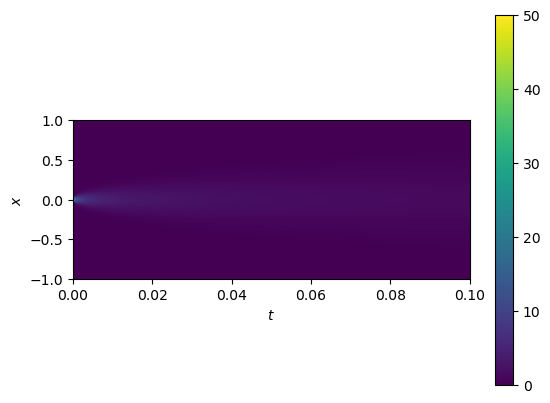

In [6]:
plt.imshow(Psi_sol,extent=(min(T),max(T),min(X),max(X)),aspect=0.02)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.colorbar()
plt.show()

Text(0, 0.5, '$\\psi(x,t)$')

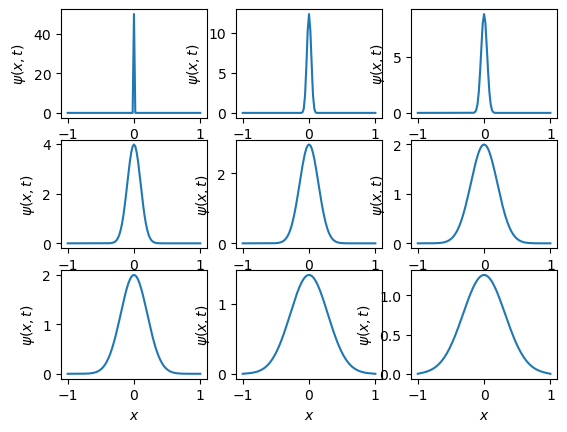

In [7]:
#Solución en un tiempo dado
plt.subplot(3,3,1)
plt.plot(X,Psi_sol[:,0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x,t)$')


plt.subplot(3,3,2)
plt.plot(X,Psi_sol[:,10])
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x,t)$')


plt.subplot(3,3,3)
plt.plot(X,Psi_sol[:,20])
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x,t)$')


plt.subplot(3,3,4)
plt.plot(X,Psi_sol[:,100])
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x,t)$')


plt.subplot(3,3,5)
plt.plot(X,Psi_sol[:,200])
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x,t)$')


plt.subplot(3,3,6)
plt.plot(X,Psi_sol[:,400])
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x,t)$')


plt.subplot(3,3,7)
plt.plot(X,Psi_sol[:,400])
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x,t)$')


plt.subplot(3,3,8)
plt.plot(X,Psi_sol[:,800])
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x,t)$')


plt.subplot(3,3,9)
plt.plot(X,Psi_sol[:,1000])
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x,t)$')

Ahora nos preguntamos que estamos encontrando. Para responder esta pregunta analizaremos el movimiento Browniano, con lo cual requeriremos librerías y métodos que utilicen números aleatorios.

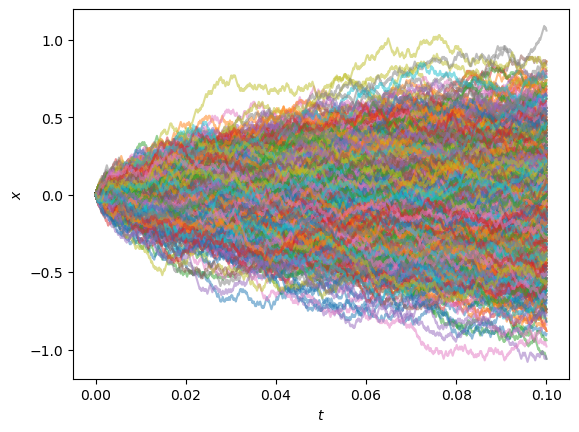

In [30]:
for r in range(1000):
    x = 0
    Pos   = np.zeros(lent) #Posiciónes
    for n in range(lent):
        Pos[n]=x
        #Moneda con valores 1 y -1 para la posición
        x +=np.random.choice([-1,1],p=[0.5,0.5])*Deltax
    plt.plot(T,Pos,alpha=0.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.show()

In [27]:
N = 1000
Data = []
for r in range(N):
    x = 0
    Pos   = np.zeros(lent) #Posiciónes
    for n in range(lent):
        Pos[n]=x
        #Moneda con valores 1 y -1 para la posición
        x +=np.random.choice([-1,1],p=[0.5,0.5])*Deltax
    Data.append(Pos)

In [28]:
Data = np.array(Data)
#Ahora obtendremos las frecuencias de las posiciones
# utilizando un histograma
freq, base = np.histogram(Data[:,400],bins=X,density=True)

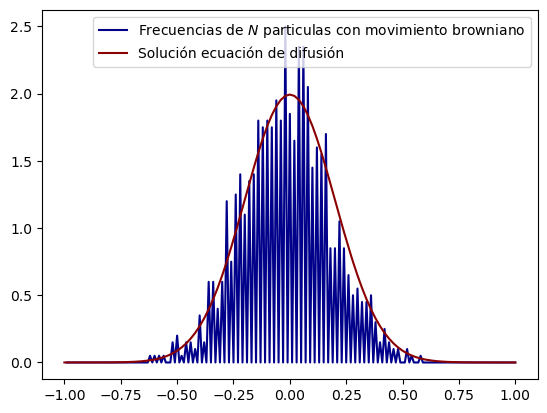

In [31]:
#El dos es un factor de normalización, ya que la simulación no captura todo el modelo
plt.plot(base[1:],freq/2,label=r'Frecuencias de $N$ particulas con movimiento browniano',color='darkblue')
plt.plot(X,Psi_sol[:,400],label=r'Solución ecuación de difusión',color='darkred')
plt.legend()
plt.show()

Por lo que estamos en realidad viendo como evoluciona la probabilidad, lo cual nos conecta con caminos aleatorios. 

### Mayo 8, 2023
# Ecuación de difusión fraccionaria y vuelos de Lévy
¿Qué pasa si el laplaciano en la ecuación de difusión ya no es de orden dos, sino de orden fraccional?. Consideremos entonces la ecuación de difusión de la forma 
$$ \nabla^2 \psi(\vec{x},t) = \frac{2}{C}\frac{\partial\psi(\vec{x},t)}{\partial t} $$
Nosotros sabemos que la solución analítica de la ecuación diferencial, cuando en t=0 tenemos una delta de Dirac centrada en el origen, es una distribución normal con desviación estandar igual a $\sigma = \sqrt{Ct}$ y para esta ecuación tenemos:
$$ C\frac{\Delta t}{\left(\Delta x\right)^2} = 1 $$

 ---
 ## Distribución de Pareto
Una distribución conocida e importante en física, más allí de la distribución normal, es la distribución de Pareto, cuya densidad de probabilidad es 
$$ \rho(x)=cx^{-\alpha}  $$
Qué concuerda con el comportamiento de la riqueza por número de personas, lecturas de artículos, etc.
---
## Derivada de Riemann-Lioville y de Caputo
Por otra parte, definimos la derivada de Riemann-Liouville como
$$  _\alpha D_t^{\alpha} f(t) = \frac{1}{\Gamma(n-\alpha)}\left(\frac{d}{dt}\right)^n \int_\alpha^t \frac{f(\tau)}{(t-\tau)^{\alpha-n+1}}d\tau$$
Para um m emtero con $n-1\leqslant \alpha \leqslant n$. La cual cumple con las definiciones usuales de derivada y, por lo tanto, es una derivada formalmente. Una derivada análoga que también cumple con la linealidad y la regla de Leibniz es la derivada de Caputo, definida como 
$$  ^C_\alpha D_t^{\alpha} f(t) = \frac{1}{\Gamma(n-\alpha)} \int_\alpha^t \frac{f^{(n)}(\tau)}{(t-\tau)^{\alpha-n+1}}d\tau$$
El cual es una especie de laplaciano fraccionario.

---
## Vuelo de Lévy
Iniciemos realizando un movimiento browniano con caminos aleatorios en cualqier dirección

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

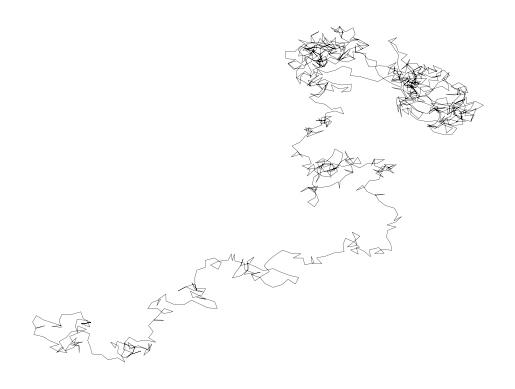

In [2]:
#Posiciones
X=[]
Y=[]
#Posiciones iniciales
x=0
y=0
#Voy haciendo pasos temporales para una particula
#De modo que formamos un camino aleatorio
for t in range(1000):
    theta=2*np.pi*np.random.rand()
    x+=np.cos(theta)
    y+=np.sin(theta)
    X.append(x)
    Y.append(y)
#Plot del camino aleatorio
plt.plot(X,Y,'k-',linewidth=0.2)
plt.axis('off')
plt.show()

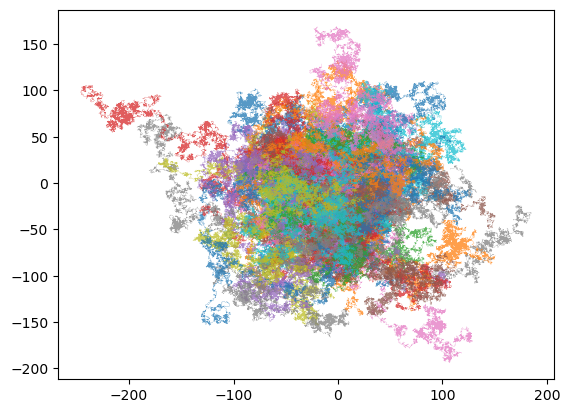

In [4]:
#Realizamos el mismo procedimiento pero estas vez para 100 particulas
for r in range(100):
    X=[]
    Y=[]
    x=0
    y=0
    for t in range(10000):
        theta=2*np.pi*np.random.rand()
        x+=np.cos(theta)
        y+=np.sin(theta)
        X.append(x)
        Y.append(y)
    #Ploteo de forma iterada
    plt.plot(X,Y,'-',linewidth=0.2,alpha=0.75)
plt.show()

Sin embargo, ¿qué sucede si la distribución de probabilidad en vez de ser uniforme es de Pareto?, para ese caso, tendremos entonces colas de Leví, un tipo de distribución que simula situaciones diferentes a los caminos aleatorios, como lo puede ser el desplazamiento de un mono en su hábitat, la forma en que se repartes los billetes e incluso el movimiento de los humanos en el tiempo.

In [7]:
#Con esto obtendremos un valor aleatorio por la distribución de Pareto
#Recuerde que en esta distribución los valores más frecuentes 
#Se encuentran localizados en un valor particular mientras que el resto
#Es menos probable
np.random.pareto(1.5)

0.10742600195844676

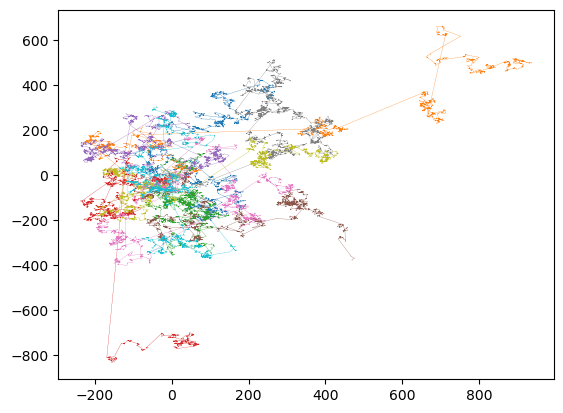

In [8]:
#Realizo un camino aleatorio con distribución de Pareto
for r in range(10):
    X=[]
    Y=[]
    x=0
    y=0
    for t in range(10000):
        theta=2*np.pi*np.random.rand()
        r=np.random.pareto(1.75)
        x+=r*np.cos(theta)
        y+=r*np.sin(theta)
        X.append(x)
        Y.append(y)
    plt.plot(X,Y,'-',linewidth=0.2)
#plt.axis('off')
plt.show()

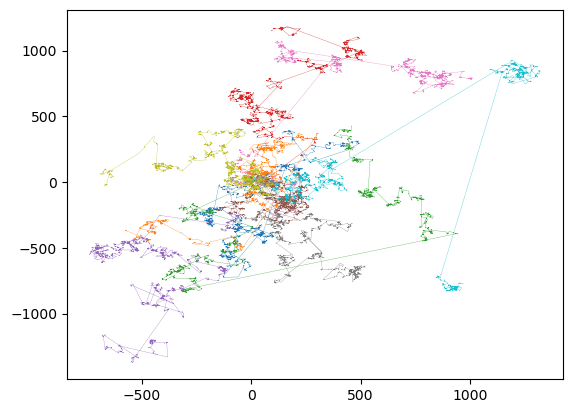

In [10]:
#Misma simulación con distinto parametro
for r in range(10):
    X=[]
    Y=[]
    x=0
    y=0
    for t in range(10000):
        theta=2*np.pi*np.random.rand()
        r=np.random.pareto(1.5)
        x+=r*np.cos(theta)
        y+=r*np.sin(theta)
        X.append(x)
        Y.append(y)
    plt.plot(X,Y,'-',linewidth=0.2)
#plt.axis('off')
plt.show()

En general, los vuelos de Lévy no se acomodan a una ecuación de difusión normal, si no que por el contrario, se comoda a una ecuación de difusi´on fraccionaria, de la forma 
$$ \frac{\partial \psi(\vec{x},t)}{\partial t} = -C_\gamma\left(-\nabla^2\right)^\gamma \psi(\vec{x},t) $$

### Mayo 12, 2023
# Ecuación de Onda
La ecuación de onda es una ecuación diferencial parcial de segundo orden presente en múltiples situaciones físicas, desde propagación del sonido a propagación de radiación y luz. En su forma más general, la ecuación de onda tiene la forma 
$$ \nabla^2\psi(\vec{x},t)-\frac{1}{v^2}\frac{\partial^2\psi(\vec{x},t)}{\partial t^2}=0  $$
Donde estamos suponiendo que no hay términos de fuente, es decir, estamos considerando la ecuación homogenea. 

Ahora consideremos el caso de una cuerda con extremos fijos, de modo que cumple con la ecuación de onda:
$$ \frac{\partial^2\psi(x,t)}{\partial x^2}-\frac{1}{v^2}\frac{\partial^2\psi(x,t)}{\partial t^2}=0 $$
donde $x \in (0,L)$ y $t\in(0,T]$, de modo que las condiciones de frontera serán
$$ \psi(0,t) = 0 \quad \psi(L,t) = 0 \quad con \quad t\in(0,T] \\
\psi(x,0) = g(x) \quad \frac{\partial \psi(x,0)}{\partial t} = 0 \quad con \quad x \in (0,L)$$
Donde es importante notar que la función $g(x)$ nos da el perfil inicial de la cuerda.


---
Para encontrar una solución numérica, discretizáremos las derivadas de segundo orden con el fin de obtener una relación final que nos permita evolucionar la función de onda en el tiempo. Recordemos que para segundas derivadas tendremos 
$$\frac{d^2 f(x)}{d x^2} \approx \frac{1}{(\Delta x)^2}[f(x+\Delta x)+f(x-\Delta x)-2 f(x)]$$
y ademas, consideraremos 
$$ C = v\frac{\Delta t}{\Delta x} = 1\\ \Delta x = v\Delta t$$
Con esto, podemos obtener finalmente 
$$ \psi(x+\Delta x,t) + \psi(x-\Delta x,t) - \psi(x,t-\Delta t) = \psi(x,t+\Delta t) $$
Por último, tendremos que discretizar las condiciones de frontera, de modo que 
$$ \frac{\partial \psi(x,t)}{\partial t} \approx \frac{\psi(x,t+\Delta t)-\psi(x,t-\Delta t)}{2\Delta t} $$
donde hemos considerado una derivada central con el fin de optimizar la condición, para $t=0$ tendremos entonces
$$\psi(x,\Delta t)=\psi(x,-\Delta t)$$
por lo tanto, tendremos entonces que 
$$  \psi(x,\Delta t) = \frac{1}{2}\left[\psi(x+\Delta x,0) + \psi(x-\Delta x,0)\right]  $$
En consecuencia:
* Para $t=0 \quad \Psi(x, 0)=g(x)$
* Para $t=\Delta t \quad \Psi(x, \Delta t) \approx \frac{1}{2}\left[\Psi(x+\Delta x,0)+\Psi(x-\Delta x, 0)\right]$
* Para $t=2 \Delta t, 3 \Delta t, 4 \Delta t \ldots \quad \Psi(x, t+\Delta t) \approx \Psi(x+\Delta x, t)+\Psi(x-\Delta x, t)- \Psi(x, t-\Delta t)$


In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.cm as cm

In [2]:
delta_t = 0.001 #Paso temporal 
t_max   = 10    #Tiempo max

#Lista de tiempos
T = np.arange(0,t_max+delta_t,delta_t)
 
L = 1 #Longitud de la cuerda
v = 1 #Velocidad de propagación de la onda

delta_x = v*delta_t #Ecuación que relaciona los delta

#Lista de posiciónes
X=np.arange(0,L+delta_x,delta_x)

In [7]:
#Creo una matriz de ceros para ingresar la solución
A,B = np.meshgrid(T,X)
Phi_Sol = np.zeros(A.shape)
Phi_Sol.fill(0)

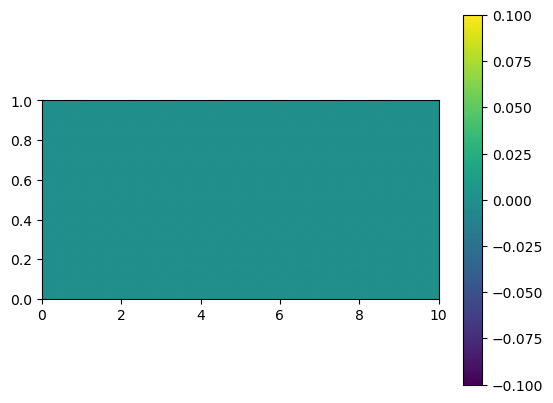

In [4]:
#Plot inicial
plt.imshow(Phi_Sol,extent=(min(T),max(T),min(X),max(X)),aspect=5,origin='lower')
plt.colorbar()
plt.show()

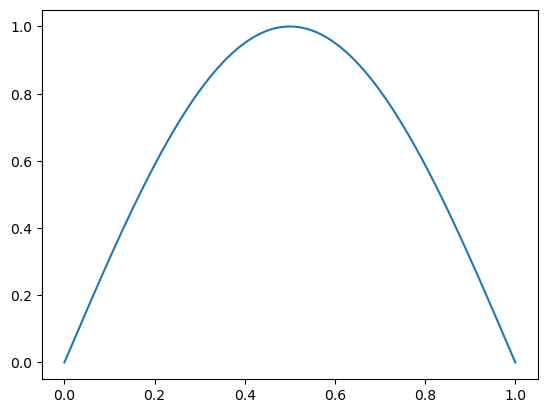

In [11]:
#Perfil inicial de la cuerda
plt.plot(X,np.sin(np.pi*X))
plt.show()

In [8]:
Phi_Sol[:,0]=10*delta_x*np.sin(np.pi*X) #Perfil inicial
Phi_Sol[0]=0  # Condición de frontera izquierda 
Phi_Sol[-1]=0 # Condición de frontera derecha

In [9]:
#Ingresamos lo que surge de discretizar la condición para las velocidades en t = 0
for i in range(1,len(X)-1):
    Phi_Sol[i,1]=(Phi_Sol[i+1,0]+Phi_Sol[i-1,0])/2

In [10]:
for n in range(2,len(T)-1): #Vamos desde el tiempo 2
    for i in range(1,len(X)-1): #Vamos desde los extremos que no son las fronteras
        Phi_Sol[i,n+1]=Phi_Sol[i+1,n]+Phi_Sol[i-1,n]-Phi_Sol[i,n-1]

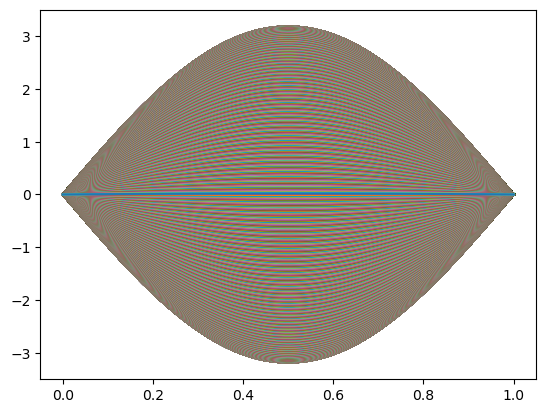

In [12]:
#Movimiento de la cuerda en el tiempo-
plt.plot(X,Phi_Sol)
plt.show()

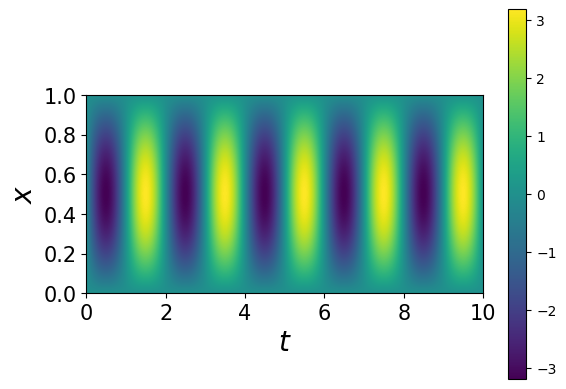

In [13]:
#Grafico de movimiento de la curda
plt.imshow(Phi_Sol,extent=(min(T),max(T),min(X),max(X)),aspect=5,origin='lower')
plt.colorbar()
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(r'$t$',size=20)
plt.ylabel(r'$x$',size=20)
plt.show()